In [53]:
# mount drive and dataset location
training_user_data_loc = r"drive/MyDrive/MSUoA/raw_user_data.csv"
training_movies_data_loc = r"drive/MyDrive/MSUoA/sample_movies.csv"

The user data is alreay converted to BERT tensors script attached

In [55]:
# declarations
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
user_df = pd.read_csv(training_user_data_loc, index_col=0)


In [56]:
user_df.head()

,user_id,movie_ids,user_ratings,user_reviews
0,ur0000006,['tt0048613'],[10],"['""Shree 420"" is a classic Bollywood film dire..."
1,ur0000011,"['tt0029712', 'tt0030337', 'tt0031270', 'tt003...","[6, 10, 6, 5, 7, 6, 6, 6, 4, 5, 7, 10]","[""Two of the greatest film villains act togeth..."
2,ur0000157,"['tt0050480', 'tt0054911', 'tt0057273', 'tt005...","[4, 10, 4, 7, 7]","[""It is a very unfortunate thing that Toho has..."
3,ur0000206,['tt0062283'],[10],"['One actor, two sets, and you never lose inte..."
4,ur0000457,['tt0054941'],[9],"[""After making Breathless (and before its succ..."


In [57]:
user_df.shape

(41071, 4)

In [58]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41071 entries, 0 to 29220
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       41071 non-null  object
 1   movie_ids     41071 non-null  object
 2   user_ratings  41071 non-null  object
 3   user_reviews  41071 non-null  object
dtypes: object(4)
memory usage: 1.6+ MB


In [59]:
user_df.describe()

,user_id,movie_ids,user_ratings,user_reviews
count,41071,41071,41071,41071
unique,41071,24317,5608,41022
top,ur0000006,['tt0044298'],[10],"[""I was absolutely delighted to have an opport..."
freq,1,23,6505,2


In [60]:
user_df['user_id'].nunique()

41071

In [61]:
movies_df = pd.read_csv(training_movies_data_loc, index_col=0)

In [62]:
movies_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','titleType', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes'], inplace=True)

In [63]:
movies_df.rename(columns={'averageRating': 'imdb_rating'}, inplace=True)

In [64]:
movies_df.head()

,tconst,imdb_rating,numVotes,directors,writers,primaryTitle,genre1,genre2,genre3
0,tt0000682,6.9,2982,nm0169871,\N,A Fantasy,Animation,Comedy,Family
1,tt0000683,5.6,97,nm0000428,nm0000428,The Fatal Hour,Crime,Short,NaN
2,tt0000684,5.0,140,nm0000428,nm0000428,Father Gets in the Game,Comedy,Short,NaN
3,tt0000700,5.0,83,nm0567363,\N,Her First Adventure,Drama,Short,NaN
4,tt0000706,5.2,33,nm0000428,"nm0000428,nm13388805,nm0786076","Ingomar, the Barbarian",Drama,Romance,Short


In [71]:
movies_df['genre1'].replace({'\\N':None}, inplace=True)
movies_df['genre2'].replace({'\\N':None}, inplace=True)
movies_df['genre3'].replace({'\\N':None}, inplace=True)

<ipython-input-71-1c8e8a2e4ffe>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_df['genre1'].replace({'\\N':None}, inplace=True)
<ipython-input-71-1c8e8a2e4ffe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [72]:
movies_df['genre1'].value_counts()

,count
genre1,
Comedy,8500
Drama,8023
Crime,2964
Animation,2650
Action,2388
Adventure,2225
Western,1566
Horror,647
Biography,535


In [73]:
movies_df.shape

(31401, 9)

In [74]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31401 entries, 0 to 31400
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tconst        31401 non-null  object 
 1   imdb_rating   31401 non-null  float64
 2   numVotes      31401 non-null  int64  
 3   directors     31401 non-null  object 
 4   writers       31401 non-null  object 
 5   primaryTitle  31401 non-null  object 
 6   genre1        31317 non-null  object 
 7   genre2        31401 non-null  object 
 8   genre3        31401 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 2.4+ MB


In [75]:
movies_df.describe()

,imdb_rating,numVotes
count,31401.000000,3.140100e+04
mean,6.238989,2.376601e+03
std,0.900382,2.117068e+04
min,1.600000,6.000000e+00
25%,5.700000,9.700000e+01
50%,6.300000,2.680000e+02
75%,6.800000,8.700000e+02
max,9.300000,2.090351e+06


In [78]:
# 1. Check for missing values
missing_values_users = user_df.isnull().sum()
missing_values_movies = movies_df.isnull().sum()
print(missing_values_users)
print(missing_values_movies)

user_id         0
movie_ids       0
user_ratings    0
user_reviews    0
dtype: int64
tconst           0
imdb_rating      0
numVotes         0
directors        0
writers          0
primaryTitle     0
genre1          84
genre2           0
genre3           0
dtype: int64


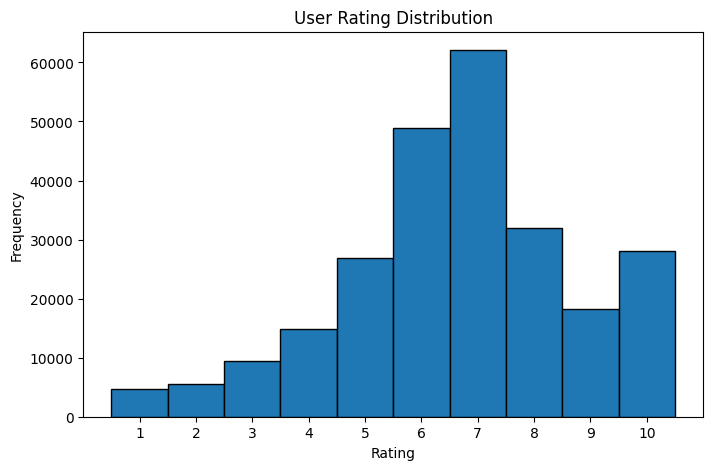

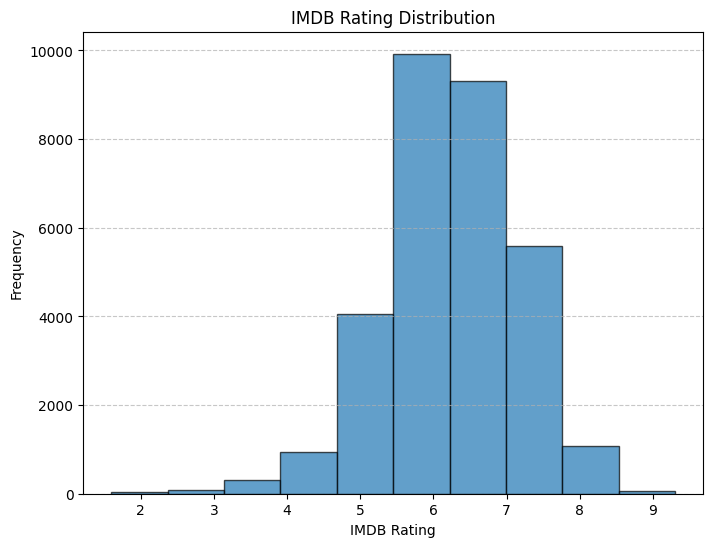

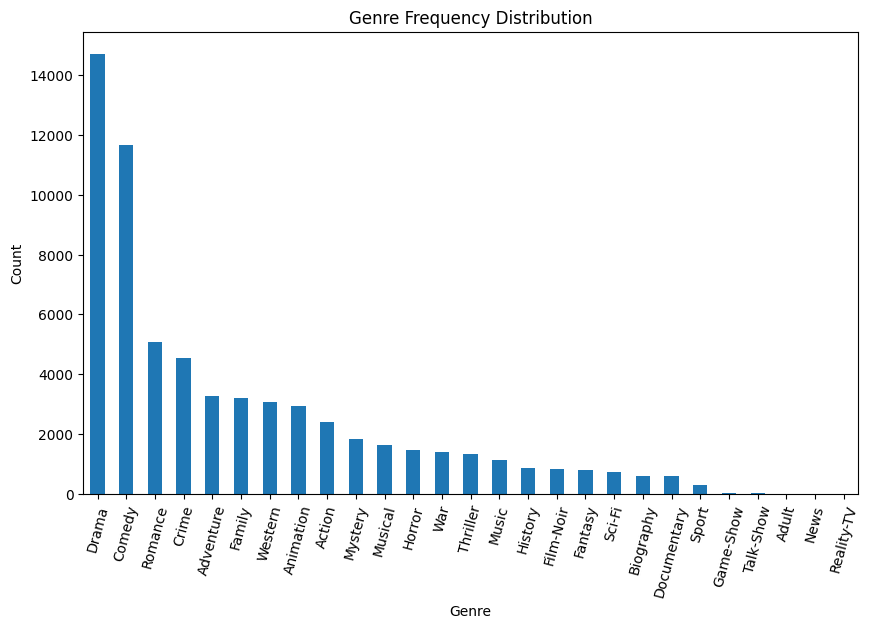

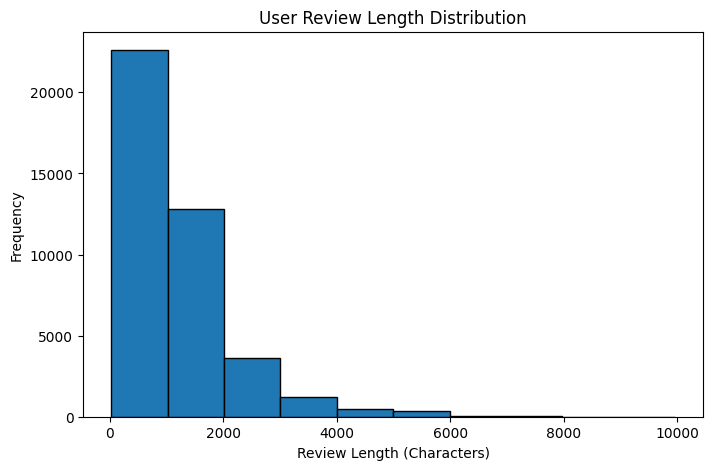

In [87]:
# 2. Visualizing rating distributions
# Flatten the user_ratings column (convert string representation of lists to actual lists)
import ast

def flatten_ratings(ratings_column):
    all_ratings = []
    for ratings in ratings_column:
        try:
            ratings_list = ast.literal_eval(ratings)
            all_ratings.extend(ratings_list)
        except:
            continue
    return all_ratings

user_ratings_list = flatten_ratings(user_df['user_ratings'])

# Plot rating distribution
plt.figure(figsize=(8, 5))
plt.hist(user_ratings_list, bins=range(1, 12), edgecolor='black', align='left')
plt.title('User Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 11))
plt.show()

# Plot IMDB rating distribution
plt.figure(figsize=(8, 6))
plt.hist(movies_df['imdb_rating'], bins=10, edgecolor='black', alpha=0.7)
plt.title("IMDB Rating Distribution")
plt.xlabel("IMDB Rating")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Genre frequency analysis
# Combine all genre columns into a single list
genres = pd.Series(movies_df[['genre1', 'genre2', 'genre3']].values.ravel()).dropna()
genre_counts = genres.value_counts().drop('Short')

# Plot genre frequency
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Frequency Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

# 4. User review length distribution
# Calculate length of reviews
user_df['review_length'] = user_df['user_reviews'].apply(lambda x: len(ast.literal_eval(x)[0]) if x != '[]' else 0)

# Plot review length distribution
plt.figure(figsize=(8, 5))
plt.hist(user_df['review_length'], bins=10, edgecolor='black')
plt.title('User Review Length Distribution')
plt.xlabel('Review Length (Characters)')
plt.ylabel('Frequency')
plt.show()
